Ejercicio de Repaso

1. Análisis exploratorio de datos (EDA)

In [2]:
# importar pandas
import pandas as pd

In [3]:
#Cargar el archivo
df = pd.read_csv("titanic.csv")

In [7]:
# imprimir las 3 primeras filas
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [9]:
#Forma del dataframe
df.shape

(418, 12)

In [10]:
#Mostrar los nombres de las columnas
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#obtener los tipos de datos
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


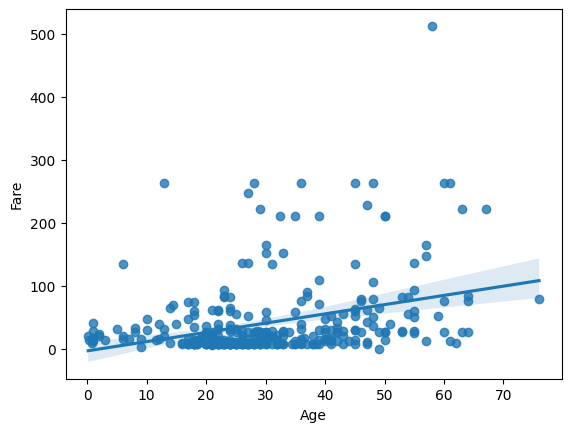

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="Age", y="Fare", data=df)
plt.show()

In [16]:
df[["Age","Survived"]].corr()

,Age,Survived
Age,1.000000,-0.000013
Survived,-0.000013,1.000000


In [19]:
df[["Age","Fare"]].corr()

,Age,Fare
Age,1.000000,0.337932
Fare,0.337932,1.000000


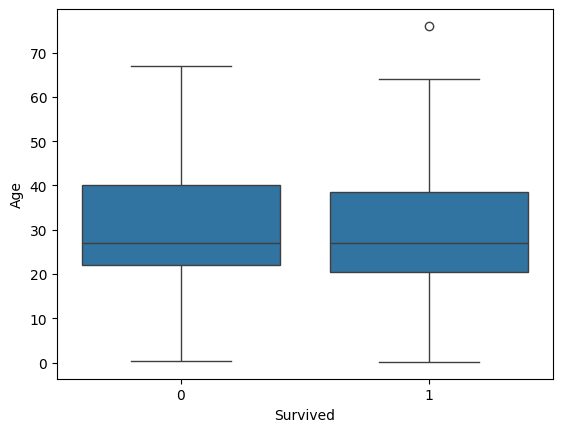

In [20]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

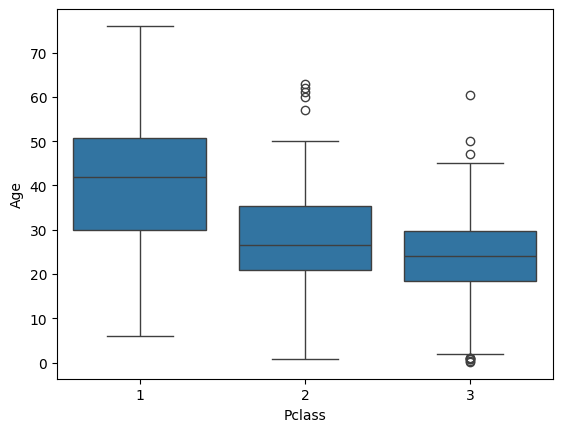

In [21]:
sns.boxplot(x="Pclass", y="Age", data=df)
plt.show()

In [24]:
# resumen de datos
df_grupo = df[['Pclass','Age','Fare']]
df_res = df_grupo.groupby(['Pclass'], as_index=False).mean()
df_res


,Pclass,Age,Fare
0,1,40.918367,94.280297
1,2,28.777500,22.202104
2,3,24.027945,12.459678


2. Preprocesamiento

In [28]:
#obtener valores nulos o faltates
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [4]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df['Age'] = imp.fit_transform(df[['Age']])

In [5]:
df.dropna(axis=0, how='any', subset=['Fare'],inplace=True)

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [46]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [8]:
d1 = {'male': 1, 'female': 2}
df['Sex']=df['Sex'].map(d1)

In [48]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,Q
1,1,3,2,47.0,1,0,7.0000,S
2,0,2,1,62.0,0,0,9.6875,Q


In [49]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [9]:
d2 = {'Q':1, 'S':2, 'C':3}
df['Embarked'] = df['Embarked'].map(d2)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,2,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1


In [10]:
#Escoger X y y
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [11]:
# Separar los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((312, 7), (105, 7), (312,), (105,))

### 3 Análisis de componentes principales (PCA)

In [12]:
# Escalar las caracteristicas
#1 Estandarizar
from sklearn.preprocessing import StandardScaler
est_esc = StandardScaler()
est_esc.fit(X_train)
X_ent_est = est_esc.transform(X_train)
X_pru_est = est_esc.transform(X_test)
print(X_ent_est[0])

[ 0.85582697 -0.73276586 -0.52351663 -0.48208665 -0.38642699 -0.53079244
 -0.2237566 ]


In [13]:
# 2. aplicamos el algoritmo PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_ent_pca = pca.fit_transform(X_ent_est)

In [14]:
pca.components_

array([[ 0.57046997, -0.10877654, -0.41162604, -0.17152775, -0.13642874,
        -0.56180194, -0.36005512],
       [ 0.21817959,  0.3911708 , -0.31878817,  0.56534168,  0.59614885,
         0.12031124, -0.09098189],
       [-0.10898699,  0.75282621,  0.15726908, -0.21827854, -0.26132112,
         0.09275551, -0.52163506]])

In [16]:
pca_df = pd.DataFrame(pca.components_.T,  columns=["PC1", "PC2", "PC3"])
print(pca_df)

        PC1       PC2       PC3
0  0.570470  0.218180 -0.108987
1 -0.108777  0.391171  0.752826
2 -0.411626 -0.318788  0.157269
3 -0.171528  0.565342 -0.218279
4 -0.136429  0.596149 -0.261321
5 -0.561802  0.120311  0.092756
6 -0.360055 -0.090982 -0.521635


In [17]:
#El primer componente representa el 31 % de la varianza por sí solo, seguido de un 20 % adicional para el segundo componente
pca.explained_variance_ratio_

array([0.31577962, 0.20393484, 0.14234566])

<BarContainer object of 3 artists>

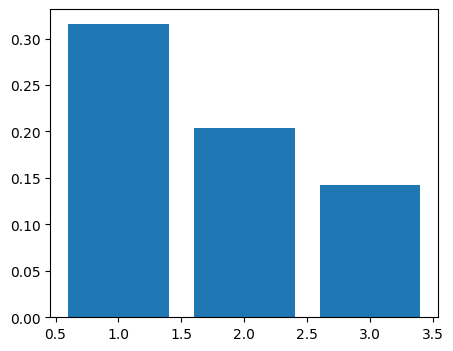

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [20]:
import numpy as np
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.31577962, 0.51971446, 0.66206012])

In [21]:
X_pru_pca = pca.transform(X_pru_est)
X_pru_pca.shape

(105, 3)

In [22]:
X_ent_pca.shape

(312, 3)

In [23]:
X_pru_pca[0]

array([ 0.81986791, -0.53319712, -1.39266878])